In [7]:
import pandas as pd

metabolites_in_pathway_df = pd.read_csv("plantcyc_pathways.csv")

In [2]:
metabolites_in_pathway_df

,Pathway ID,Type,Pathway Name,Metabolite,Name,SMILES
0,PWY-6232,FLAVONOID-SYN,chrysoeriol biosynthesis,5734-TETRAHYDROXYFLAVONE,luteolin,C3(/C=C(C(/O)=C\C(\C1(\OC2(/C=C(/C=C(C(\C(=O)\...
1,PWY-6232,FLAVONOID-SYN,chrysoeriol biosynthesis,574-TRIHYDROXY-3-METHOXYFLAVONE,chrysoeriol,COC1(\C(\O)=C/C=C(/C=1)/C2(/OC3(/C=C(/C=C(C(\C...
2,PWY0A-6303,Auxin-Biosynthesis,methyl indole-3-acetate interconversion,CPD-10546,methyl (indol-3-yl)acetate,COC(=O)CC1(\C2(\C(\N\C=1)=C/C=C\C=2))
3,PWY0A-6303,Auxin-Biosynthesis,methyl indole-3-acetate interconversion,INDOLE_ACETATE_AUXIN,(indol-3-yl)acetate,C([O-])(=O)CC1(\C2(/C=C\C=C/C(/N\C=1)=2))
4,PWY-5409,Divinyl-Ether-Biosynthesis,divinyl ether biosynthesis II,LINOLEIC_ACID,linoleate,CCCCC\C=C/C\C=C/CCCCCCCC([O-])=O
...,...,...,...,...,...,...
3206,PWY-5925,Siderophores-Biosynthesis,hydroxylated mugineic acid phytosiderophore bi...,CPD-7231,mugineate,C1(C[C@@H](C([O-])=O)N1C[C@H](O)[C@H]([NH2+]CC...
3207,PWY-5925,Siderophores-Biosynthesis,hydroxylated mugineic acid phytosiderophore bi...,CPD-7289,3-epihydroxymugineate,C1([C@H](O)[C@@H](C([O-])=O)N1C[C@H](O)[C@H]([...
3208,PWY18C3-18,DITERPENOID-SYN,labdenediol and sclareol biosynthesis,CPD-12745,(13<i>E</i>)-8&alpha;-hydroxylabd-13-en-15-yl ...,CC(/CC[C@@H]1([C@]2(CCCC(C)(C)[C@@H](CC[C@](O)...
3209,PWY18C3-18,DITERPENOID-SYN,labdenediol and sclareol biosynthesis,CPD-10110,sclareol,C=C[C@](C)(O)CC[C@H]1([C@](C)(O)CC[C@H]2(C(C)(...


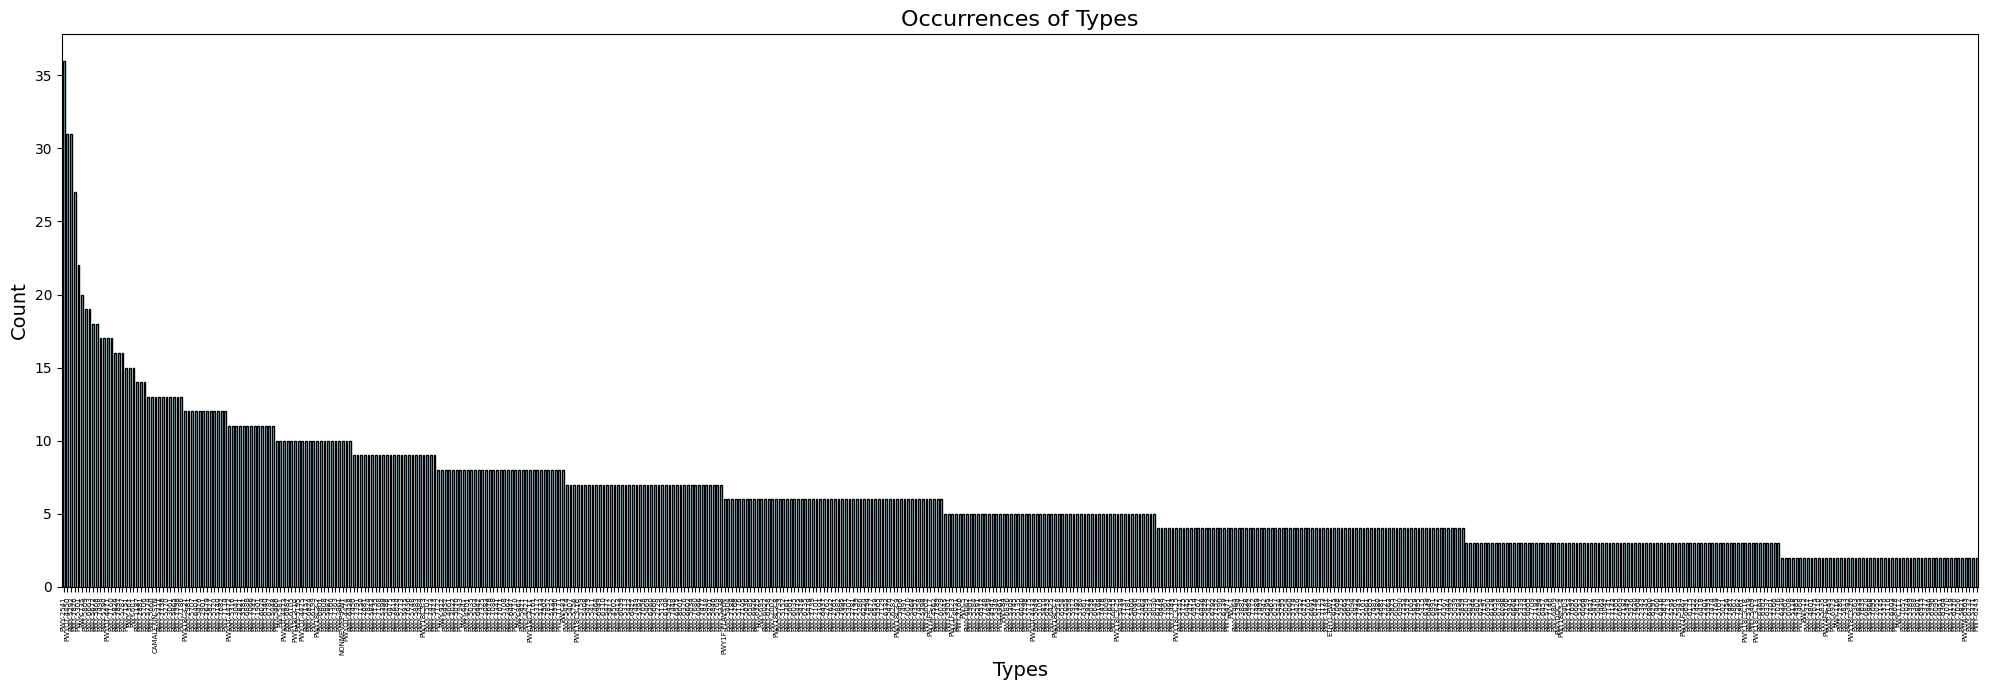

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = metabolites_in_pathway_df["Pathway ID"].value_counts()

# Plot the results
plt.figure(figsize=(20, 7))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Types", fontsize=16)
plt.xlabel("Types", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=5)
plt.tight_layout()
plt.show()

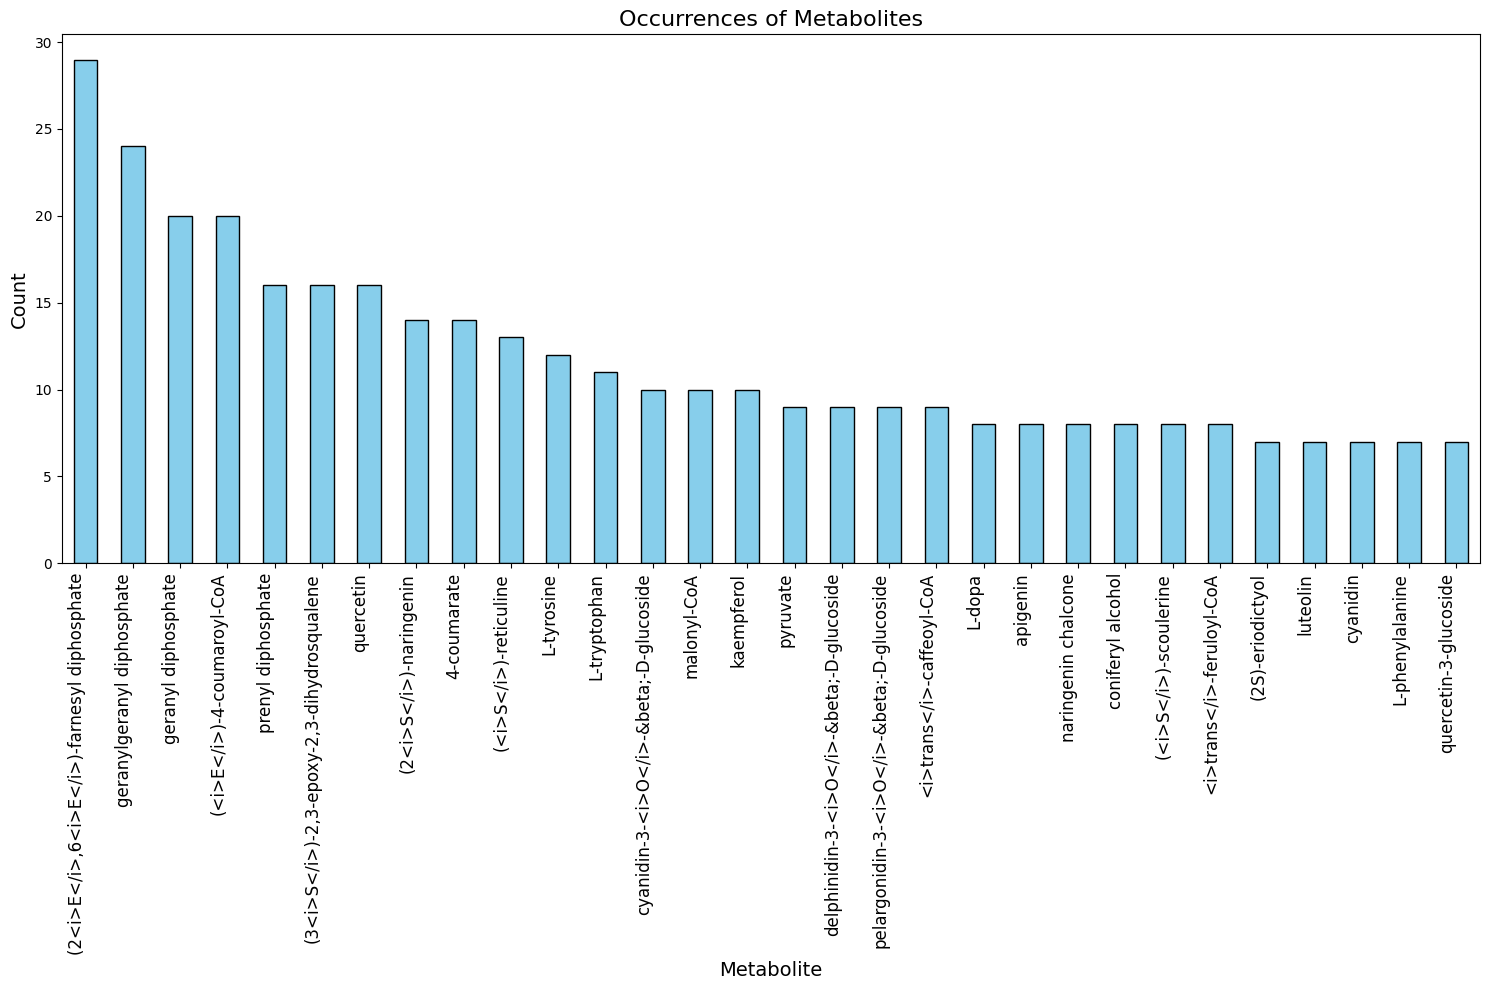

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = metabolites_in_pathway_df["Name"].value_counts()[:30]

# Plot the results
plt.figure(figsize=(15, 10))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Metabolites", fontsize=16)
plt.xlabel("Metabolite", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
pathway_counts = metabolites_in_pathway_df["Name"].value_counts()[:40]


to_delete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 18, 19, 20, 21, 22, 27, 28, 30]
pathway_counts[to_delete]

Name
(2<i>E</i>,6<i>E</i>)-farnesyl diphosphate    29
geranylgeranyl diphosphate                    24
geranyl diphosphate                           20
(<i>E</i>)-4-coumaroyl-CoA                    20
prenyl diphosphate                            16
(3<i>S</i>)-2,3-epoxy-2,3-dihydrosqualene     16
quercetin                                     16
(2<i>S</i>)-naringenin                        14
4-coumarate                                   14
L-tyrosine                                    12
L-tryptophan                                  11
malonyl-CoA                                   10
kaempferol                                    10
pyruvate                                       9
<i>trans</i>-caffeoyl-CoA                      9
L-dopa                                         8
apigenin                                       8
naringenin chalcone                            8
coniferyl alcohol                              8
cyanidin                                       7
L-phenylalanine

In [9]:
import pandas as pd
from rdkit import Chem

import pandas as pd
from rdkit import Chem

# Define the function to check hydrogen count
def has_more_non_hydrogens_than_threshold(smiles, threshold):
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        return False
     # Add hydrogens to the molecule
    non_hydrogen_count = sum(atom.GetSymbol() != 'H' for atom in molecule.GetAtoms())
    return non_hydrogen_count >= threshold



# Define the hydrogen threshold
threshold = 7

# Apply the function and filter the DataFrame
metabolites_in_pathway_df['HasEnoughNonHydrogens'] = metabolites_in_pathway_df['SMILES'].apply(lambda x: has_more_non_hydrogens_than_threshold(x, threshold))
metabolites_in_pathway_df = metabolites_in_pathway_df[metabolites_in_pathway_df['HasEnoughNonHydrogens']]

# Drop the helper column
metabolites_in_pathway_df = metabolites_in_pathway_df.drop(columns=['HasEnoughNonHydrogens'])
metabolites_in_pathway_df.reset_index()

[11:46:12] WARNING: not removing hydrogen atom without neighbors
[11:46:12] Conflicting single bond directions around double bond at index 17.
[11:46:12]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:46:12] Conflicting single bond directions around double bond at index 17.
[11:46:12]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:46:12] Conflicting single bond directions around double bond at index 12.
[11:46:12]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:46:12] Conflicting single bond directions around double bond at index 17.
[11:46:12]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:46:12] SMILES Parse Error: syntax error while parsing: C(OC(=O)[R1])[C@H](COP([O-])(=O)O[C@@H]1([C@H](O)[C@H](O)[C@@H](OP(=O)([O-])[O-])[C@H](OP(=O)([O-])[O-])[C@@H](O)1))OC(=O)[R2]
[11:46:12] SMILES Parse Error: Failed parsing SMILES 'C(OC(=O)[R1])[C@H](COP([O-])(=O)O[C@@H]1([C@H](O)[C@H](

,index,Pathway ID,Type,Pathway Name,Metabolite,Name,SMILES
0,0,PWY-6232,FLAVONOID-SYN,chrysoeriol biosynthesis,5734-TETRAHYDROXYFLAVONE,luteolin,C3(/C=C(C(/O)=C\C(\C1(\OC2(/C=C(/C=C(C(\C(=O)\...
1,1,PWY-6232,FLAVONOID-SYN,chrysoeriol biosynthesis,574-TRIHYDROXY-3-METHOXYFLAVONE,chrysoeriol,COC1(\C(\O)=C/C=C(/C=1)/C2(/OC3(/C=C(/C=C(C(\C...
2,2,PWY0A-6303,Auxin-Biosynthesis,methyl indole-3-acetate interconversion,CPD-10546,methyl (indol-3-yl)acetate,COC(=O)CC1(\C2(\C(\N\C=1)=C/C=C\C=2))
3,3,PWY0A-6303,Auxin-Biosynthesis,methyl indole-3-acetate interconversion,INDOLE_ACETATE_AUXIN,(indol-3-yl)acetate,C([O-])(=O)CC1(\C2(/C=C\C=C/C(/N\C=1)=2))
4,4,PWY-5409,Divinyl-Ether-Biosynthesis,divinyl ether biosynthesis II,LINOLEIC_ACID,linoleate,CCCCC\C=C/C\C=C/CCCCCCCC([O-])=O
...,...,...,...,...,...,...,...
3126,3206,PWY-5925,Siderophores-Biosynthesis,hydroxylated mugineic acid phytosiderophore bi...,CPD-7231,mugineate,C1(C[C@@H](C([O-])=O)N1C[C@H](O)[C@H]([NH2+]CC...
3127,3207,PWY-5925,Siderophores-Biosynthesis,hydroxylated mugineic acid phytosiderophore bi...,CPD-7289,3-epihydroxymugineate,C1([C@H](O)[C@@H](C([O-])=O)N1C[C@H](O)[C@H]([...
3128,3208,PWY18C3-18,DITERPENOID-SYN,labdenediol and sclareol biosynthesis,CPD-12745,(13<i>E</i>)-8&alpha;-hydroxylabd-13-en-15-yl ...,CC(/CC[C@@H]1([C@]2(CCCC(C)(C)[C@@H](CC[C@](O)...
3129,3209,PWY18C3-18,DITERPENOID-SYN,labdenediol and sclareol biosynthesis,CPD-10110,sclareol,C=C[C@](C)(O)CC[C@H]1([C@](C)(O)CC[C@H]2(C(C)(...


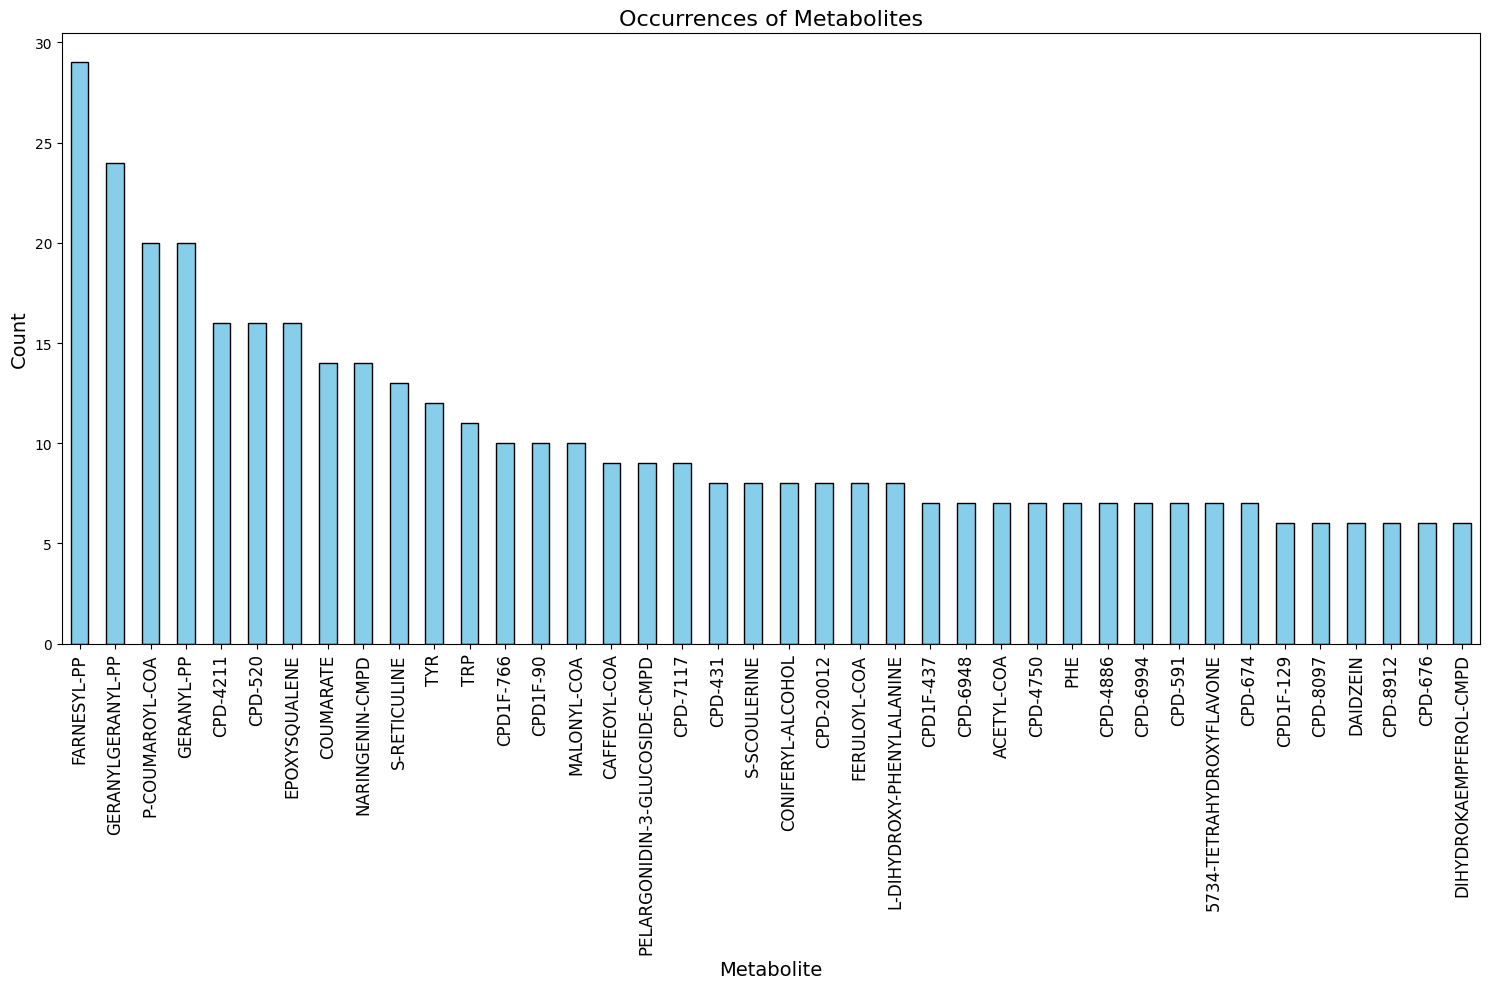

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = metabolites_in_pathway_df["Metabolite"].value_counts()[:40]

# Plot the results
plt.figure(figsize=(15, 10))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Metabolites", fontsize=16)
plt.xlabel("Metabolite", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
metabolites_to_delete = pathway_counts[to_delete].index.to_list()

In [12]:
metabolites_in_pathway_df = metabolites_in_pathway_df[~metabolites_in_pathway_df["Metabolite"].isin(metabolites_to_delete)]

In [13]:
# Count occurrences of each type
type_counts = metabolites_in_pathway_df["Pathway ID"].value_counts()

# Get types that appear more than 10 times
types_to_keep = type_counts[type_counts >= 5].index

# Filter the dataframe
metabolites_in_pathway_df = metabolites_in_pathway_df[metabolites_in_pathway_df["Pathway ID"].isin(types_to_keep)]

In [14]:
metabolites_in_pathway_df["Pathway ID"].value_counts()

Pathway ID
PWY-2541      36
PWYQT-4450    31
PWY-5292      31
PWY-7826      25
PWY-5301      22
              ..
PWY-5          5
PWY-6062       5
PWY-5037       5
PWY-5045       5
PWY-3301       5
Name: count, Length: 257, dtype: int64

In [15]:
metabolites_in_pathway_df

,Pathway ID,Type,Pathway Name,Metabolite,Name,SMILES
13,PWY-5176,COUMARIN-SYN,coumarin biosynthesis (via 2-coumarate),CPD-7418,coumarinate,C(\C=C/C1(\C=C/C=C\C(O)=1))(=O)[O-]
14,PWY-5176,COUMARIN-SYN,coumarin biosynthesis (via 2-coumarate),COUMARIN,coumarin,C1(OC2(\C(/C=C\1)=C/C=C\C=2))=O
15,PWY-5176,COUMARIN-SYN,coumarin biosynthesis (via 2-coumarate),CPD-7417,<i>cis</i>-coumarinic acid-&beta;-<i>D</i>-glu...,C([C@H]2(O[C@@H](OC1(\C=C/C=C\C(\C=C/C(=O)[O-]...
16,PWY-5176,COUMARIN-SYN,coumarin biosynthesis (via 2-coumarate),CPD-459,2-O-(&beta;-<i>D</i>-glucosyl)-2-hydroxycinnamate,C(O)[C@@H]1([C@H]([C@H](O)[C@@H](O)[C@@H](O1)O...
17,PWY-5176,COUMARIN-SYN,coumarin biosynthesis (via 2-coumarate),2-COUMARATE,<i>trans</i>-2-coumarate,C(/C=C/C1(\C=C/C=C\C(O)=1))([O-])=O
...,...,...,...,...,...,...
3199,PWY-7897,FLAVONOID-SYN,flavonoid di-C-glucosylation,ISOVITEXIN,isovitexin,C4(/C=C(\C=C/C(/C1(/OC3(\C(\C(=O)\C=1)=C(C(\[C...
3200,PWY-7897,FLAVONOID-SYN,flavonoid di-C-glucosylation,VITEXIN,vitexin,C([C@@H]4([C@H]([C@@H]([C@H]([C@H](C2(/C3(/OC(...
3201,PWY-7897,FLAVONOID-SYN,flavonoid di-C-glucosylation,CPD-12655,"1-(4-hydroxyphenyl)-3-(2,4,6-trihydroxyphenyl)...",C2(\C(\C(=O)CC(=O)C1(/C(/O)=C\C(\O)=C/C(/O)=1)...
3202,PWY-7897,FLAVONOID-SYN,flavonoid di-C-glucosylation,CPD-20010,nothofagin,C(O)[C@@H]3([C@@H](O)[C@H](O)[C@@H](O)[C@H](C1...


In [16]:
metabolites_in_pathway_df = metabolites_in_pathway_df.groupby(["Name", "SMILES", "Metabolite"], as_index=False).agg({"Pathway ID": list})
metabolites_in_pathway_df

,Name,SMILES,Metabolite,Pathway ID
0,&Delta;<sup>24-25</sup>-sitosterol,CCC(CC[C@@H](C)[C@H]3(CC[C@H]4([C@@H]2(C\C=C1(...,CPD-4142,[PWY-2541]
1,&Delta;<sup>9</sup>-tetrahydrocannabinol,CCCCCC1(\C=C(C2(\[C@@H]3(\C=C(C)/CC[C@@H](C(C)...,CPD-7172,[PWY-5140]
2,&Delta;<sup>9</sup>-tetrahydrocannabinolate,CCCCCC1(\C(\C([O-])=O)=C(C2(\[C@@H]3(\C=C(C)/C...,CPD-7169,[PWY-5140]
3,"&alpha;-3',4'-anhydrovinblastine",CCC7(\C[NH+]6(CCC8(\C9(\C(\NC(/[C@@](C(=O)OC)(...,CPD-13001,[PWY-5292]
4,"&alpha;-3',4'-anhydrovinblastine radical",CCC7(\C[NH+]6(CCC8(\C9(\C(\NC(/[C@@](C(=O)OC)(...,CPD-21576,[PWY-5292]
...,...,...,...,...
1726,zealexin A3,CC2(C)([C@H](O)C(/[C@@H]1(C/C=C(CC1)/C([O-])=O...,CPD-13571,[PWY-6888]
1727,zealexin A4,CC2(C)(C(=O)C(/[C@@H]1(C/C=C(CC1)/C([O-])=O))=...,CPD-21541,[PWY-6888]
1728,zealexin B1,CC2(C)(CC(/C1(\CCC(/C([O-])=O)=C\C=1))=C\CC2),CPD-13572,[PWY-6888]
1729,zealexin C3,CC2(C)([C@H](O)C(/C1(\C=C/C(/C([O-])=O)=C\C=1)...,CPD-21269,[PWY-6888]


In [17]:
metabolites_in_pathway_df["Pathway ID"].apply(len).describe()

count    1731.000000
mean        1.224148
std         0.623727
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: Pathway ID, dtype: float64

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
label_array = mlb.fit_transform(metabolites_in_pathway_df["Pathway ID"])
metabolites_in_pathway_df = pd.concat((metabolites_in_pathway_df, pd.DataFrame(label_array, columns=mlb.classes_)), axis=1)
metabolites_in_pathway_df.to_csv("plant_cyc_pathways_w_labels.csv", index=False)

In [19]:
label_array.shape

(1731, 257)

In [20]:
metabolites_in_pathway_df

,Name,SMILES,Metabolite,Pathway ID,CAMALEXIN-SYN,NONMEVIPP-PWY,PWY-1187,PWY-1901,PWY-2002,PWY-2083,...,PWY18C3-8,PWY18C3-9,PWY4FS-17,PWYQT-4433,PWYQT-4450,PWYQT-4471,PWYQT-4472,PWYQT-4473,PWYQT-4474,PWYQT-4475
0,&Delta;<sup>24-25</sup>-sitosterol,CCC(CC[C@@H](C)[C@H]3(CC[C@H]4([C@@H]2(C\C=C1(...,CPD-4142,[PWY-2541],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,&Delta;<sup>9</sup>-tetrahydrocannabinol,CCCCCC1(\C=C(C2(\[C@@H]3(\C=C(C)/CC[C@@H](C(C)...,CPD-7172,[PWY-5140],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,&Delta;<sup>9</sup>-tetrahydrocannabinolate,CCCCCC1(\C(\C([O-])=O)=C(C2(\[C@@H]3(\C=C(C)/C...,CPD-7169,[PWY-5140],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"&alpha;-3',4'-anhydrovinblastine",CCC7(\C[NH+]6(CCC8(\C9(\C(\NC(/[C@@](C(=O)OC)(...,CPD-13001,[PWY-5292],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"&alpha;-3',4'-anhydrovinblastine radical",CCC7(\C[NH+]6(CCC8(\C9(\C(\NC(/[C@@](C(=O)OC)(...,CPD-21576,[PWY-5292],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,zealexin A3,CC2(C)([C@H](O)C(/[C@@H]1(C/C=C(CC1)/C([O-])=O...,CPD-13571,[PWY-6888],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1727,zealexin A4,CC2(C)(C(=O)C(/[C@@H]1(C/C=C(CC1)/C([O-])=O))=...,CPD-21541,[PWY-6888],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1728,zealexin B1,CC2(C)(CC(/C1(\CCC(/C([O-])=O)=C\C=1))=C\CC2),CPD-13572,[PWY-6888],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1729,zealexin C3,CC2(C)([C@H](O)C(/C1(\C=C/C(/C([O-])=O)=C\C=1)...,CPD-21269,[PWY-6888],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
